<a href="https://colab.research.google.com/github/aashish3298/udemybooks/blob/master/dab103_proj_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAB103 - EDA

GROUP 04 - Simranjeet Vij - 0768953 | Vanshaj Bahal - 0768894

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import plotly.express as px
import io
import requests


## Importing the data

In [ ]:
url="https://raw.githubusercontent.com/sjsinggh/dab103_sem01_proj/master/movies.csv"

req_content = requests.get(url).content

movies = pd.read_csv(io.StringIO(req_content.decode('utf-8')), index_col = "ID")

movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
movies.shape

(16744, 15)

## Clean and Transform data

### 01. We will only analyse movies that have a valid genre associated 

Genre is an key feature that will be used for our business problem, hence records with missing genre can be removed as they wont serve any purpose in our analyis.


#### A. Getting number of movies where Genre not available

In [ ]:
movies.Genres.isnull().sum()

275

#### B. Hence we need to get rid of these 275 records

In [ ]:
df_movies = movies[~movies.Genres.isnull()]

df_movies.shape

(16469, 15)

### 02. Handling Runtime

In [ ]:
df_movies.Runtime.describe()

count    16116.000000
mean        93.441549
std         28.106166
min          1.000000
25%         82.000000
50%         92.000000
75%        104.000000
max       1256.000000
Name: Runtime, dtype: float64

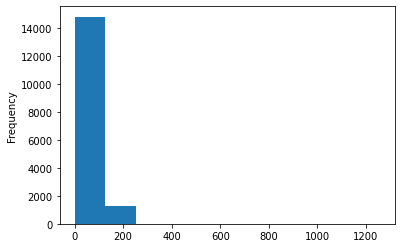

In [ ]:
df_movies.Runtime.plot.hist()  #getting a skewed distribution

#### A. We can see that the maximum movie length is 1256 mins (around 20hrs) while the min length is 1 min.

While the duration of 1256 mins is most probably a error in data collection the shorter duration movies could indicate that they belong to the short film genre.

Assuming this analysis is for a typical movie streamer,

- We can safely filter out the short films genre which does not have a mass audience,
- Similarly we can rule out extremenly long duration movies which is also not very typical.
- Hence taking 4 hrs as the upper limit while around 50 mins as the lower limit of the run time.
- This will also automatically remove any outliers in our data if any.


In [ ]:
df_movies = df_movies[~df_movies.Genres.str.contains("Short")]

In [ ]:
df_movies = df_movies.loc[(df_movies['Runtime']>50) & (df_movies['Runtime'] <= 240)]

In [ ]:
df_movies.Runtime.describe()

count    15376.000000
mean        96.090661
std         22.173394
min         51.000000
25%         84.000000
50%         93.000000
75%        105.000000
max        240.000000
Name: Runtime, dtype: float64

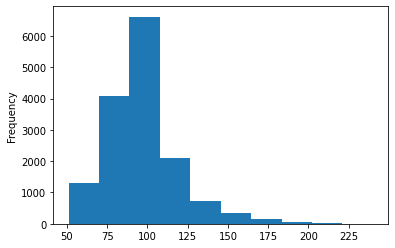

In [ ]:
df_movies.Runtime.plot.hist()  #getting a more normal distribution

### 03. Language and Country

In [ ]:
df_movies[["Language", "Country"]].head()

,Language,Country
ID,,
1,"English,Japanese,French","United States,United Kingdom"
2,English,United States
3,English,United States
4,English,United States
5,Italian,"Italy,Spain,West Germany"


#### A. For Language and Country features, the first value among the comma separated values denotes the original language and origin country of the movie respectively.

Hence we will trim down the columns with multiple values to get the only the first value in that cell.

#### B. Defing a method to split and get the first value in a cell 

In [ ]:
def get_first_val(inputstr):
    if (str(inputstr)):
        return str(inputstr).split(",")[0]
    else:
        return None

#### C. Applying the method to Language and Country

In [ ]:
df_movies["Country"] = df_movies["Country"].apply(get_first_val)

df_movies["Language"] = df_movies["Language"].apply(get_first_val)

Text(0.5, 0, 'Counts')

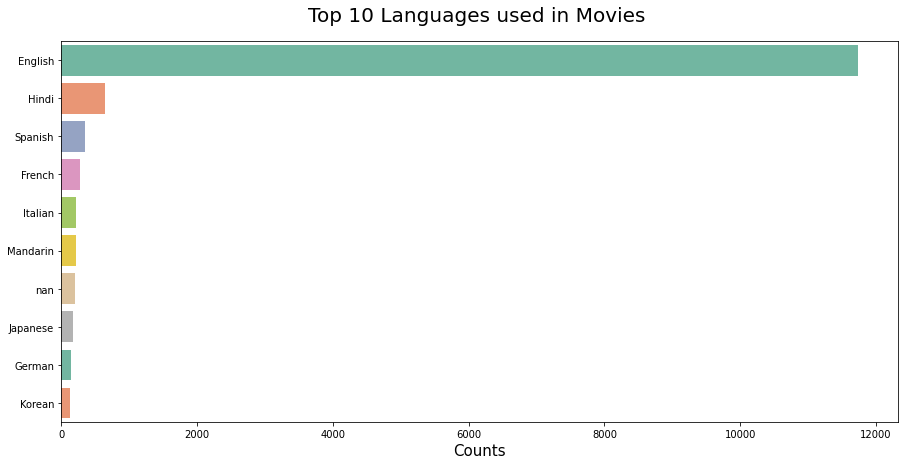

In [ ]:
plt.figure(figsize=(15,7))
chains=df_movies['Language'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='Set2')
plt.title("Top 10 Languages used in Movies ",size=20,pad=20)
plt.xlabel("Counts",size=15)

Text(0.5, 0, 'Counts')

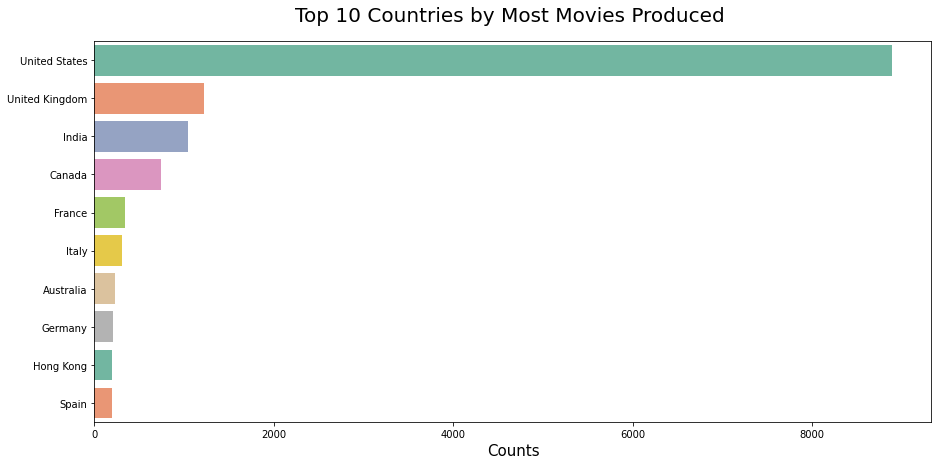

In [ ]:
plt.figure(figsize=(15,7))
chains=df_movies['Country'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='Set2')
plt.title("Top 10 Countries by Most Movies Produced ",size=20,pad=20)
plt.xlabel("Counts",size=15)

### 04. Heatmap of missing values

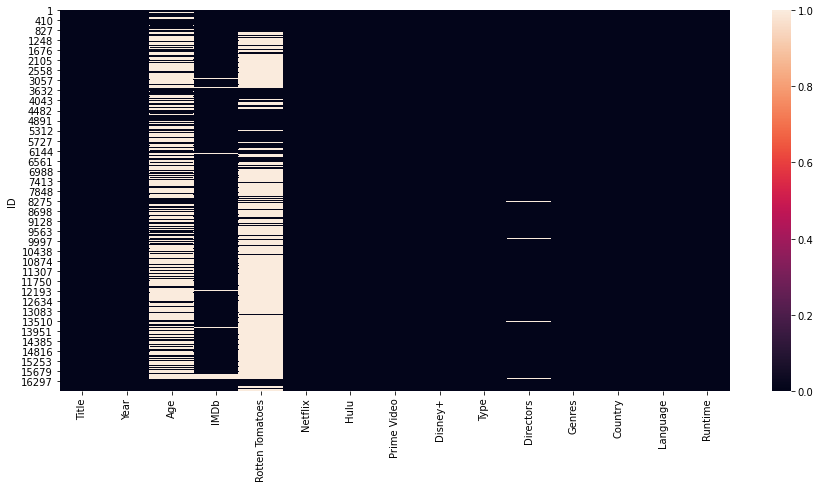

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df_movies.isnull())

#### A. Looking at the Age column we see that there are many missing values.

Replacing blank values with "NA"

In [ ]:
df_movies["Age"].fillna("NA", inplace = True)

In [ ]:
df_movies["Age"].describe()

count     15376
unique        6
top          NA
freq       8333
Name: Age, dtype: object

### 05. Type Column

In [ ]:
df_movies["Type"].describe()

count    15376.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Type, dtype: float64

#### A. Dropping Type as it is invalid

In [ ]:
df_movies = df_movies.drop(columns=['Type'])

## Transformed Dataset

In [ ]:
df_movies.head(10)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller",United States,English,148.0
2,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,Italy,Italian,161.0
6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,English,117.0
7,The Pianist,2002,18+,8.5,95%,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War",United Kingdom,English,150.0
8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,English,165.0
9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,English,115.0


## Analysis

In [ ]:
df_movies["Netflix"].value_counts()

0    12207
1     3169
Name: Netflix, dtype: int64

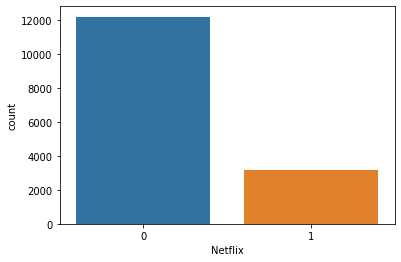

In [ ]:
sns.countplot(x='Netflix', data=df_movies)

In [ ]:
df_movies["Hulu"].value_counts()

0    14515
1      861
Name: Hulu, dtype: int64

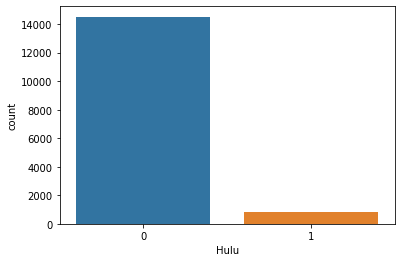

In [ ]:
sns.countplot(x='Hulu', data=df_movies)

In [ ]:
df_movies["Prime Video"].value_counts()

1    11440
0     3936
Name: Prime Video, dtype: int64

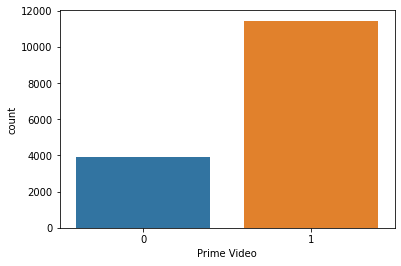

In [ ]:
sns.countplot(x='Prime Video', data=df_movies)

In [ ]:
df_movies["Disney+"].value_counts()

0    14871
1      505
Name: Disney+, dtype: int64

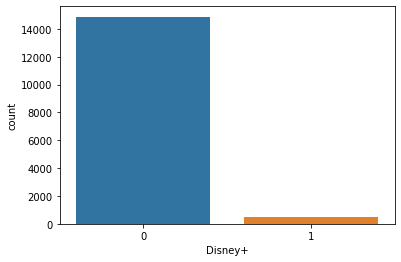

In [ ]:
sns.countplot(x='Disney+', data=df_movies)

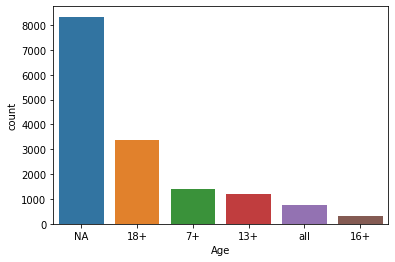

In [ ]:
sns.countplot(x='Age', data=df_movies, order = df_movies['Age'].value_counts().index )

### Plotting Year vs Runtime (for all age ratings)


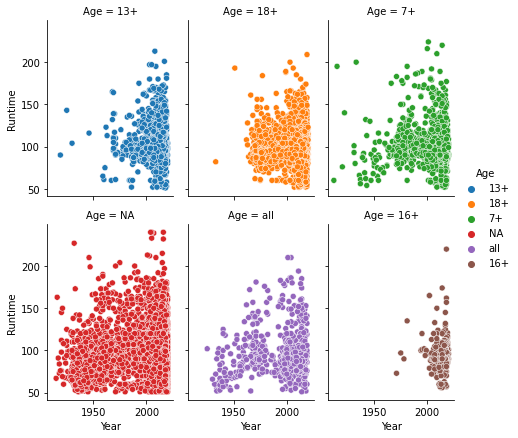

In [ ]:
sns.relplot(
    data= df_movies, x="Year", y="Runtime", hue="Age",
    col="Age",
    kind="scatter",
    height=3, aspect=.7,
    col_wrap=3
)

Text(0.5, 0, 'Counts')

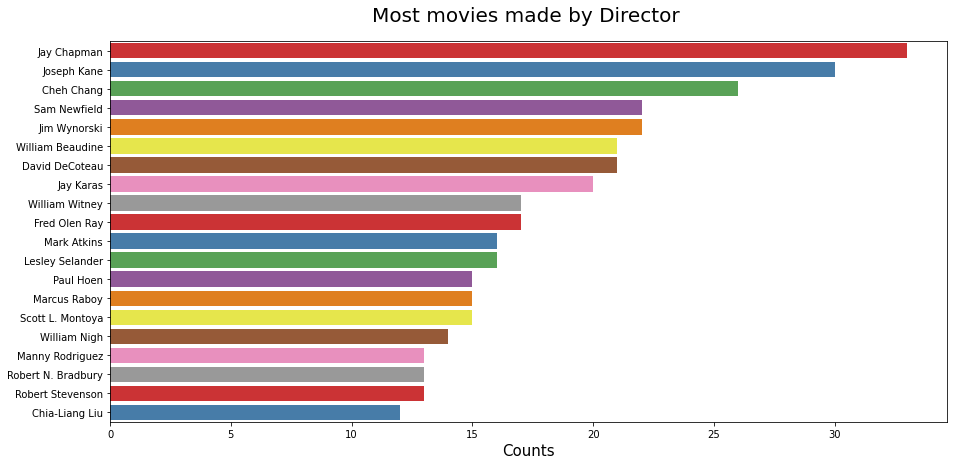

In [ ]:
plt.figure(figsize=(15,7))
chains=df_movies['Directors'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most movies made by Director ",size=20,pad=20)
plt.xlabel("Counts",size=15)

Text(0.5, 0, 'Counts')

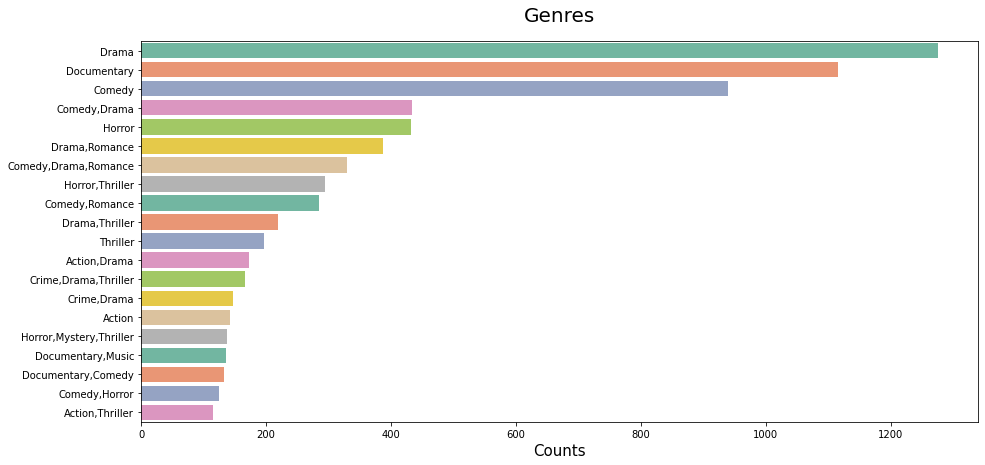

In [ ]:
plt.figure(figsize=(15,7))
chains=df_movies['Genres'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set2')
plt.title("Genres",size=20,pad=20)
plt.xlabel("Counts",size=15)

### Potting KDE for Year and  Runtime (For all OTT platforms)


In [ ]:
def kde(i,dataframe,platform):
    plt.subplot(i)
    plt.title(platform)
    dataframe=dataframe.loc[dataframe[platform] == 1]
    sns.kdeplot(data=dataframe['Runtime'],shade=True)
    plt.xlabel('Runtime in minutes', fontsize = 15)
    plt.legend(fontsize = 15);
    plt.subplot(i+1)
    sns.kdeplot(data=dataframe['Year'], shade=True)
    plt.xlabel('Release Year', fontsize = 15)
    plt.legend(fontsize = 15)
    plt.title(platform)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


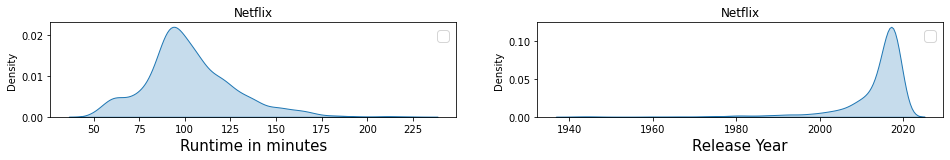

In [ ]:
plt.figure(figsize = (16, 8))

kde(421,df_movies,'Netflix')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


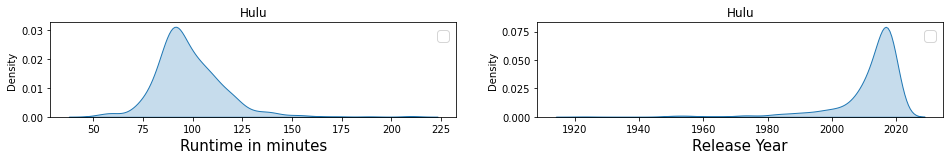

In [ ]:
plt.figure(figsize = (16, 8))
kde(423,df_movies,'Hulu')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


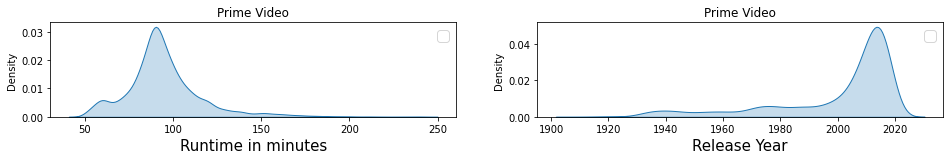

In [ ]:
plt.figure(figsize = (16, 8))
kde(425,df_movies,'Prime Video')


No handles with labels found to put in legend.
No handles with labels found to put in legend.


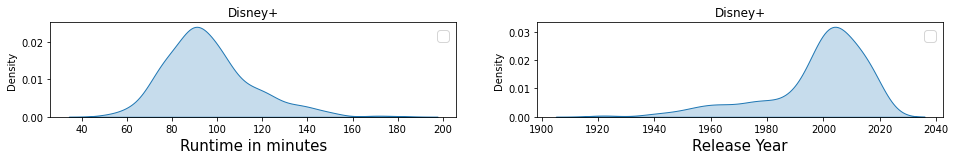

In [ ]:
plt.figure(figsize = (16, 8))
kde(427,df_movies,'Disney+')